# Options 1

This notebook shows payoff functions and pricing bounds for options.

## Load Packages and Extra Functions

In [1]:
using Printf

include("jlFiles/printmat.jl");

In [2]:
using Plots, LaTeXStrings

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :png)

# Payoffs and Profits of Options

Let $K$ be the strike price, $S_m$ the price of the underlying at expiration ($m$ years ahead) of the option contract and
$y$ the continously compounded interest rate.

The call and put profits (at expiration) are

$\text{call profit}_{m}\ = \max\left(  0,S_{m}-K\right) - e^{my}C$

$\text{put profit}_{m}=\max\left(  0,K-S_{m}\right)  - e^{my}P $,

where $C$ and $P$ are the call and put option prices (paid today). In both cases the first term ($\max()$) represents the payoff at expiration, while the second term ($e^{my}C$ or $e^{my}P$) subtracts the capitalised value of the option price (premium) paid at inception of the contract. 

The profit of a straddle is the sum of those of a call and a put.

### A Remark on the Code
- `Sₘ_range` is a vector (or range) of $S_m$ values. The idea is to show the payoff (or profit) at different possible outcomes of the final price of the underlying.
- `Sₘ_range .> K` creates a vector of false/true. Notice that the dot (`.`) is needed to compare each element in `Sₘ_range` to the number `K`.
- `ifelse.(Sₘ_range.>K,"yes","no")` creates a vector of "yes" or "no" depending on whether `Sₘ_range.>K` or not. This is one of several possible ways of writing an `if` statement.

In [3]:
Sₘ_range = [4.5,5.5]   #possible values of underlying at expiration
K  = 5                 #strike price
C  = 0.4               #call price (just a number that I made up)
P  = 0.4               #put price 
(y,m) = (0,1)          #zero interest to keep it simple, 1 year to expiration

CallPayoff = max.(0,Sₘ_range.-K)               #payoff at expiration
CallProfit = CallPayoff .- exp(m*y)*C    #profit at expiration

ExerciseIt  = ifelse.(Sₘ_range.>K,"yes","no")  #"yes"/"no" for exercise

printblue("Payoff and profit of a call option with strike price $K, price (premium) of $C and interest rate $y:\n")
printmat([Sₘ_range ExerciseIt CallPayoff CallProfit],colNames=["Sₘ","Exercise","Payoff","Profit"])

Payoff and profit of a call option with strike price 5, price (premium) of 0.4 and interest rate 0:

        Sₘ  Exercise    Payoff    Profit
     4.500        no     0.000    -0.400
     5.500       yes     0.500     0.100



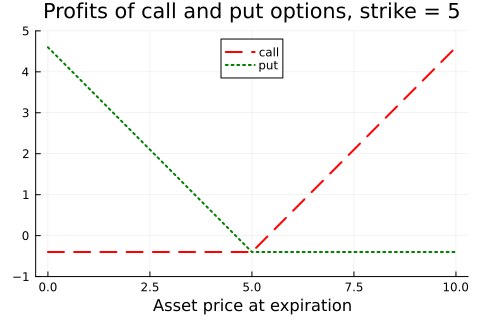

In [4]:
Sₘ_range = 0:0.1:10          #more possible outcomes, for plotting

CallProfit = max.(0,Sₘ_range.-K) .- exp(m*y)*C
PutProfit  = max.(0,K.-Sₘ_range) .- exp(m*y)*P

p1 = plot( Sₘ_range,[CallProfit PutProfit],
           linecolor = [:red :green],
           linestyle = [:dash :dot],
           linewidth = 2,
           label = ["call" "put"],
           ylim = (-1,5),
           legend = :top,
           title = "Profits of call and put options, strike = $K",
           xlabel = "Asset price at expiration" )
display(p1)

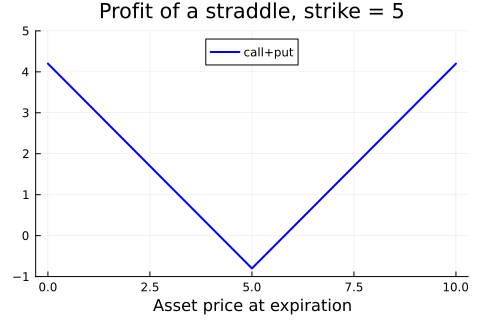

In [5]:
StraddleProfit = CallProfit + PutProfit   #a straddle: 1 call and 1 put

p1 = plot( Sₘ_range,StraddleProfit,
           linecolor = :blue,
           linewidth = 2,
           label = "call+put",
           ylim = (-1,5),
           legend = :top,
           title = "Profit of a straddle, strike = $K",
           xlabel = "Asset price at expiration" )
display(p1)

# Put-Call Parity for European Options

A no-arbitrage condition says that

$
C-P=e^{-my}(F-K)
$

must hold, where $F$ is the forward price. This is the *put-call parity*.

When the underlying asset has no dividends (until expiration of the option), then the forward-spot parity says that $F=e^{my}S$, which can be used in the put-call partity to substitute for $F$.

In [6]:
(S,K,m,y) = (42,38,0.5,0.05)    #current price of underlying etc

C = 5.5                   #assume this is the price of a call option(K)

F = exp(m*y)*S            #forward-spot parity
P = C - exp(-m*y)*(F-K)

printblue("Put-Call parity when (C,S,y,m)=($C,$S,$y,$m):\n")

printmat([C,exp(-m*y),F-K,P],rowNames=["C","exp(-m*y)","F-K","P"])

Put-Call parity when (C,S,y,m)=(5.5,42,0.05,0.5):

C             5.500
exp(-m*y)     0.975
F-K           5.063
P             0.562



# Pricing Bounds

The pricing bounds for (American and European) call options are

$$
\begin{align*}
C  &  \leq e^{-my}F\\
C  &  \geq\max[0,e^{-my}(F-K)]
\end{align*}
$$

We plot these bounds as functions of the strike price $K$.

In [7]:
(S,K,m,y) = (42,38,0.5,0.05)        #current price of underlying etc

F = exp(m*y)*S

C_Upper = exp(-m*y)*F
C_Lower = max.(0,exp(-m*y)*(F-K))  #pricing bounds for a (single) strike price

printlnPs("Pricing bounds for European call option with strike $K: ",C_Lower,C_Upper)

Pricing bounds for European call option with strike 38:      4.938    42.000


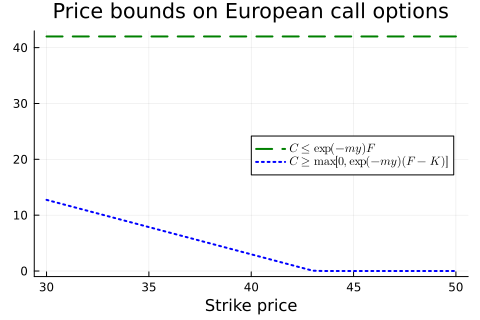

In [8]:
K_range = 30:0.5:50             #pricing bounds for many strike prices
n = length(K_range)

C_Upper = exp(-m*y)*F
C_Lower = max.(0,exp(-m*y)*(F.-K_range));

p1 = plot( K_range,[C_Upper*ones(n) C_Lower],
           linecolor = [:green :blue],
           linewidth = 2,
           linestyle = [:dash :dot],
           label = [L"C \leq \exp(-my)F " L"C \geq \max[0,\exp(-my)(F-K)]"],
           ylim = (-1,S+1),
           legend = :right,
           title = "Price bounds on European call options",
           xlabel = "Strike price" )
display(p1)

The pricing bounds for (European) put options are

$$
\begin{align*}
P_{E}  &  \leq e^{-my}K\\
e^{-my}(K-F)  &  \leq P_{E}
\end{align*}
$$

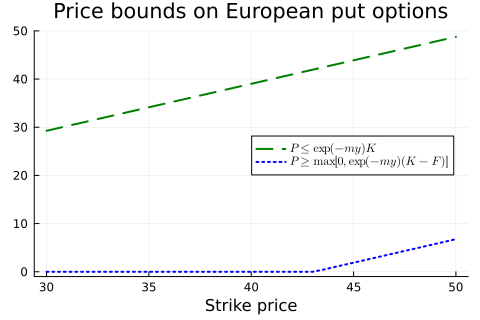

In [9]:
P_Upper = exp(-m*y)*K_range
P_Lower = max.(0,exp(-m*y)*(K_range.-F))

p1 = plot( K_range,[P_Upper P_Lower],
           linecolor = [:green :blue],
           linewidth = 2,
           linestyle = [:dash :dot],
           label = [L" P \leq \exp(-my)K " L" P \geq \max[0,\exp(-my)(K-F)]  "],
           ylim = (-1,50),
           legend = :right,
           title = "Price bounds on European put options",
           xlabel = "Strike price" )
display(p1)